In [2]:
import datasets as ds
import pathlib as pl

In [7]:
data

Dataset({
    features: ['data_source', 'prompt', 'ability', 'reward_model', 'extra_info', 'completion', 'reward'],
    num_rows: 123685
})

Creating parquet from Arrow format:   0%|          | 0/118 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

44740767

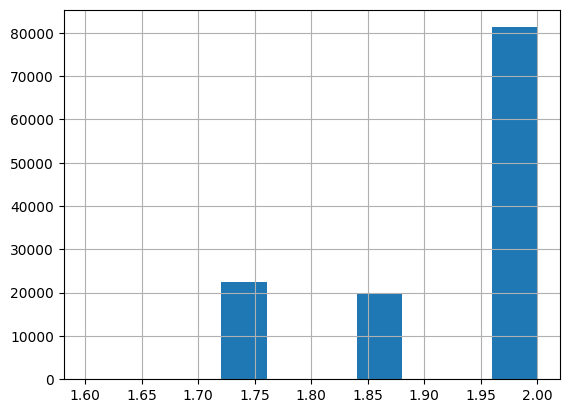

In [6]:
data = ds.concatenate_datasets([
    ds.Dataset.from_parquet(
        str(item)
    ) for item in pl.Path("../data/sft/").glob("mt-eval*.parquet")
])

data = data.filter(lambda x: x['reward'] > 1.6)
data.to_pandas()['reward'].hist()

data = data.shuffle(seed=42)
train = data.select(range(0, int(len(data) * 0.95)))
val = data.select(range(int(len(data) * 0.95), len(data)))

train.to_parquet("../data/sft-clean/mt-eval-train.parquet")
val.to_parquet("../data/sft-clean/mt-eval-val.parquet")

<Axes: >

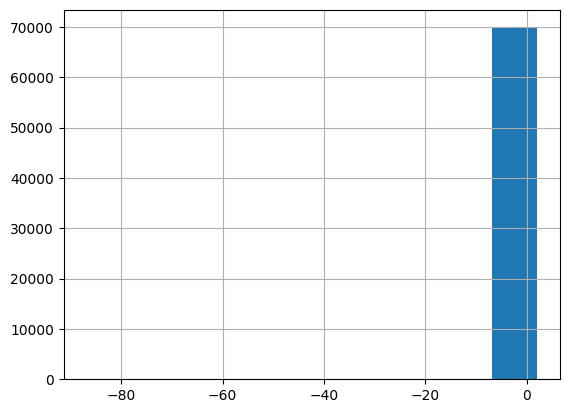

In [ ]:
data.filter().to_pandas()['reward'].hist()